In [57]:
!pip install pymongo


In [58]:
import pymongo

from pymongo import MongoClient

In [59]:
client = MongoClient("localhost", 27017)
client.list_database_names()

['admin', 'breastCancerAnalysis', 'config', 'employee', 'local']

In [60]:
db = client["breastCancerAnalysis"]
wisconsinDataset = db["wisconsinDataset"]

In [61]:
db.list_collection_names()
wisconsinDataset.count_documents({})

569

 db.wisconsinDataset.aggregate([
                                { $group: { _id: "$diagnosis", count: { $count: { } }}},
                                { $out: "diagnosis"}
]);
                              

In [63]:
wisconsinDataset.aggregate(
    [{
    "$group" : 
        {"_id" : "$diagnosis", 
         "count" : {"$count" : {}}}},
    {"$out": "diagnosis"}
         
    ])

In [64]:
FIELDS = {'_id': True, 'count':True}
collection = db["diagnosis"]
dia = collection.find(projection=FIELDS)
dia = list(dia)

In [65]:
import pandas as pd

diagnosis_df = pd.DataFrame(dia)
diagnosis_df.columns = ['diagnosis', 'count']

Text(0.5, 1.0, 'Count of diagnosis')

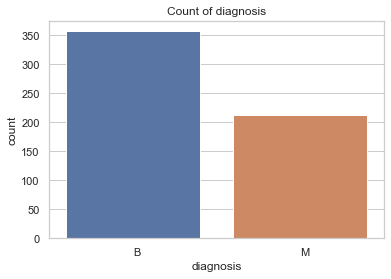

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.barplot(x="diagnosis", y="count", data=diagnosis_df)
ax.set_xticklabels(ax.get_xticklabels(), ha = 'left')
plt.title("Count of diagnosis")


In [78]:
wisconsinDataset.aggregate(
    [{
    "$group" : 
        {"_id" : "$diagnosis", 
         "average" : {"$avg" : "$radius_mean"}
  
    }
    },
        {"$out": "averageRadius"}
    ])

Text(0.5, 1.0, 'Radius Mean')

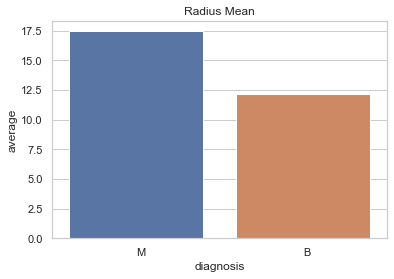

In [81]:
FIELDS = {'_id': True, 'average':True}
collection = db["averageRadius"]
aR = collection.find(projection=FIELDS)
aR = list(aR)

aR_df = pd.DataFrame(aR)
aR_df.columns = ['diagnosis', 'average']

ax = sns.barplot(x="diagnosis", y="average", data=aR_df)
ax.set_xticklabels(ax.get_xticklabels(), ha = 'left')
plt.title("Radius Mean")